### Space X Falcon 9 First Stage Landing Prediction - Machine Learning

In [1]:
pip install numpy pandas seaborn matplotlib scikit-learn


   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.2 MB 7.6 MB/s eta 0:00:02
   ----------- ---------------------------- 3.1/11.2 MB 8.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.2 MB 8.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.2 MB 9.9 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.2 MB 10.5 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


### Load Datasets

In [6]:
# data  contains the target labels (class).
url1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(url1)
data.head()



,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
# X contains the features.
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(url2)
X.head()


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Create a NumPy array from the column Class in data, by applying the method to_numpy() then assign it to the variable Y

In [8]:
Y = data['Class'].to_numpy()
print(type(Y))
print(Y[:10])

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0]


### Standardize the data in X then reassign it to the variable X using the transform
- Standardizing = subtract mean and divide by standard deviation so each feature has mean = 0 and std = 1.

In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit and transform
X = scaler.fit_transform(X)


### Split Standardized Data into Training and Test Sets.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, 
    Y, 
    test_size=0.2, 
    random_state=2
)


### Check For Test Samples

In [11]:
Y_test.shape

(18,)

### Create a logistic regression object then create a GridSearchCV object logreg_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters

In [15]:
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}
lr = LogisticRegression()


In [16]:
from sklearn.model_selection import GridSearchCV

# Create GridSearchCV
logreg_cv = GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10
)

# Fit to training data
logreg_cv.fit(X_train, Y_train)

# Output results
print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy: 0.8464285714285713


### Calculate the accuracy on the test data using the method score

In [17]:
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.8333333333333334


### Confusion Matrix

In [18]:
def plot_confusion_matrix(y_true, y_pred, class_labels=['did not land', 'landed']):
    """
    This function plots the confusion matrix.
    """
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(6, 4))

    # Plot heatmap
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        cbar=False,
        ax=ax
    )

    # Set labels, title, and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_labels)
    ax.yaxis.set_ticklabels(class_labels)

    plt.tight_layout()
    plt.show()


In [20]:
yhat_logreg = logreg_cv.predict(X_test)


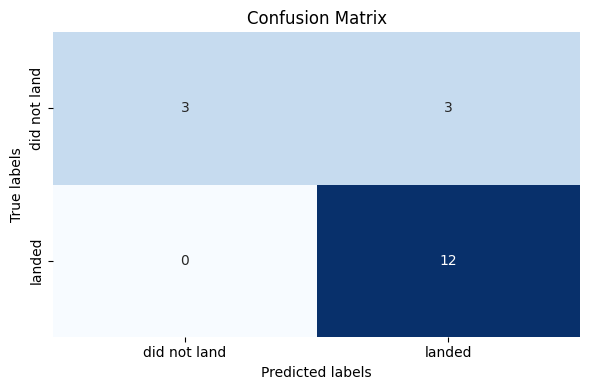

In [21]:
plot_confusion_matrix(Y_test, yhat_logreg)


### Create a support vector machine object then create a GridSearchCV object svm_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [22]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale']
}


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create SVM object
svm = SVC()

# Create GridSearchCV
svm_cv = GridSearchCV(
    estimator=svm,
    param_grid=parameters,
    cv=10
)

# Fit to training data
svm_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale'],
                         'kernel': ['linear', 'rbf']})

In [24]:
print("Tuned hyperparameters (best parameters):", svm_cv.best_params_)
print("Accuracy:", svm_cv.best_score_)


Tuned hyperparameters (best parameters): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8196428571428571


### Calculate the accuracy on the test data using the method score 

In [25]:
test_accuracy = svm_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7777777777777778


###  Plot the Confusion Matrix for your SVM Predictions.

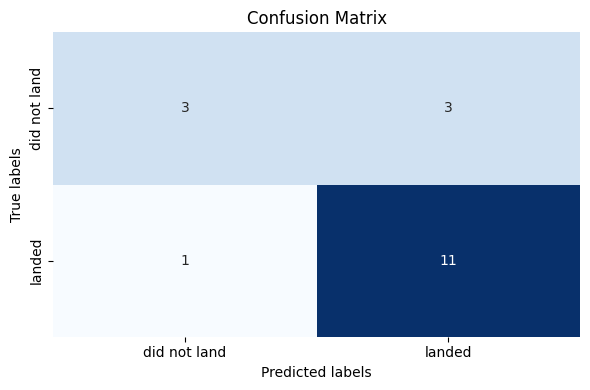

In [26]:
# Predict
yhat_svm = svm_cv.predict(X_test)

# Plot
plot_confusion_matrix(Y_test, yhat_svm)


### Create a decision tree classifier object then create a GridSearchCV object tree_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [27]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4],
}


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create Decision Tree object
tree = DecisionTreeClassifier()

# Create GridSearchCV
tree_cv = GridSearchCV(
    estimator=tree,
    param_grid=parameters,
    cv=10
)

# Fit to training data
tree_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4]})

In [29]:
print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 4}
Accuracy: 0.8714285714285713


In [30]:
# Test Accuracy
test_accuracy = tree_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7777777777777778


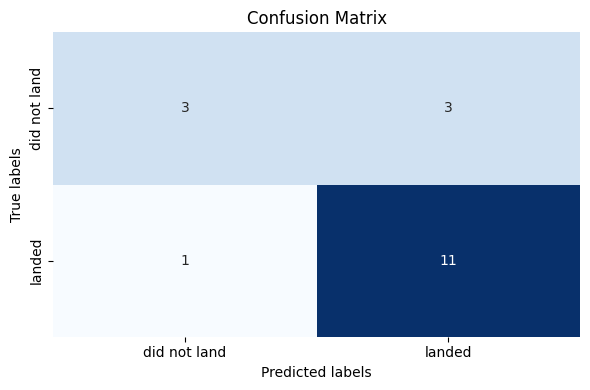

In [31]:
# Confusion Matrix For Your Decision Tree predictions 
# Predict
yhat_tree = tree_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(Y_test, yhat_tree)


### Create a k nearest neighbors object then create a GridSearchCV object knn_cv with cv = 10. Fit the object to find the best parameters from the dictionary parameters.

In [32]:
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto']
}


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Create KNN object
knn = KNeighborsClassifier()

# Create GridSearchCV
knn_cv = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    cv=10
)

# Fit to training data
knn_cv.fit(X_train, Y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [ ]:
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
Accuracy: 0.7785714285714285


In [35]:
# Calculate the accuracy of knn_cv on the test data using the method score:
test_accuracy = knn_cv.score(X_test, Y_test)
print("Test set accuracy:", test_accuracy)


Test set accuracy: 0.7777777777777778


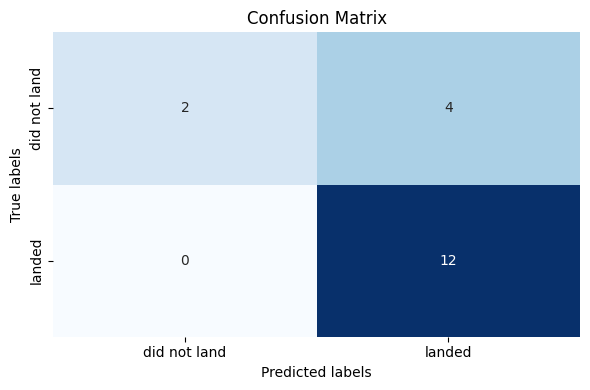

In [36]:
# Confusion Matrix For  KNN Predictions
# Predict
yhat_knn = knn_cv.predict(X_test)

# Plot confusion matrix
plot_confusion_matrix(Y_test, yhat_knn)



### Find The Method  that Performs Best:

In [38]:
#Logistic Regression:
logreg_test_acc = logreg_cv.score(X_test, Y_test)

#Support Vector Machine:
svm_test_acc = svm_cv.score(X_test, Y_test)

#Decision Tree:
tree_test_acc = tree_cv.score(X_test, Y_test)

#K Nearest Neighbors:
knn_test_acc = knn_cv.score(X_test, Y_test)

In [39]:
print("Logistic Regression Test Accuracy:", logreg_test_acc)
print("SVM Test Accuracy:", svm_test_acc)
print("Decision Tree Test Accuracy:", tree_test_acc)
print("KNN Test Accuracy:", knn_test_acc)


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.7777777777777778
Decision Tree Test Accuracy: 0.7777777777777778
KNN Test Accuracy: 0.7777777777777778


In [40]:
accuracies = {
    "Logistic Regression": logreg_test_acc,
    "SVM": svm_test_acc,
    "Decision Tree": tree_test_acc,
    "KNN": knn_test_acc
}

best_model = max(accuracies, key=accuracies.get)
print("Best performing model:", best_model)
print("Accuracy:", accuracies[best_model])


Best performing model: Logistic Regression
Accuracy: 0.8333333333333334
